In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

In [3]:
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')

In [4]:
net

<dnn_Net 000002BF58FC8CF0>

In [5]:
image = cv2.imread('004545.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,(300, 300), 127.5)

print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


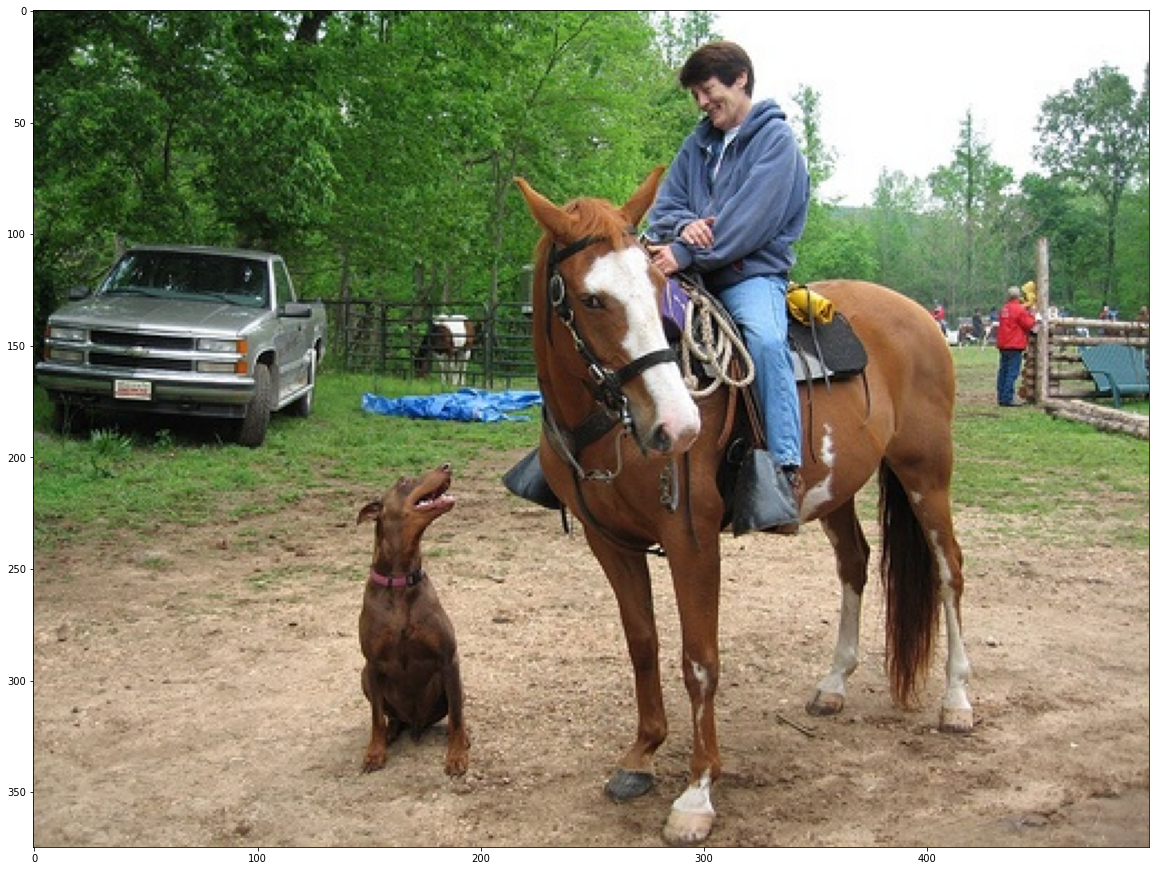

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# loop over the detections
for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for
        # the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),(0,0,255), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

[INFO] horse: 99.91%
[INFO] car: 99.43%
[INFO] person: 88.44%
[INFO] dog: 61.78%
[INFO] cat: 57.60%


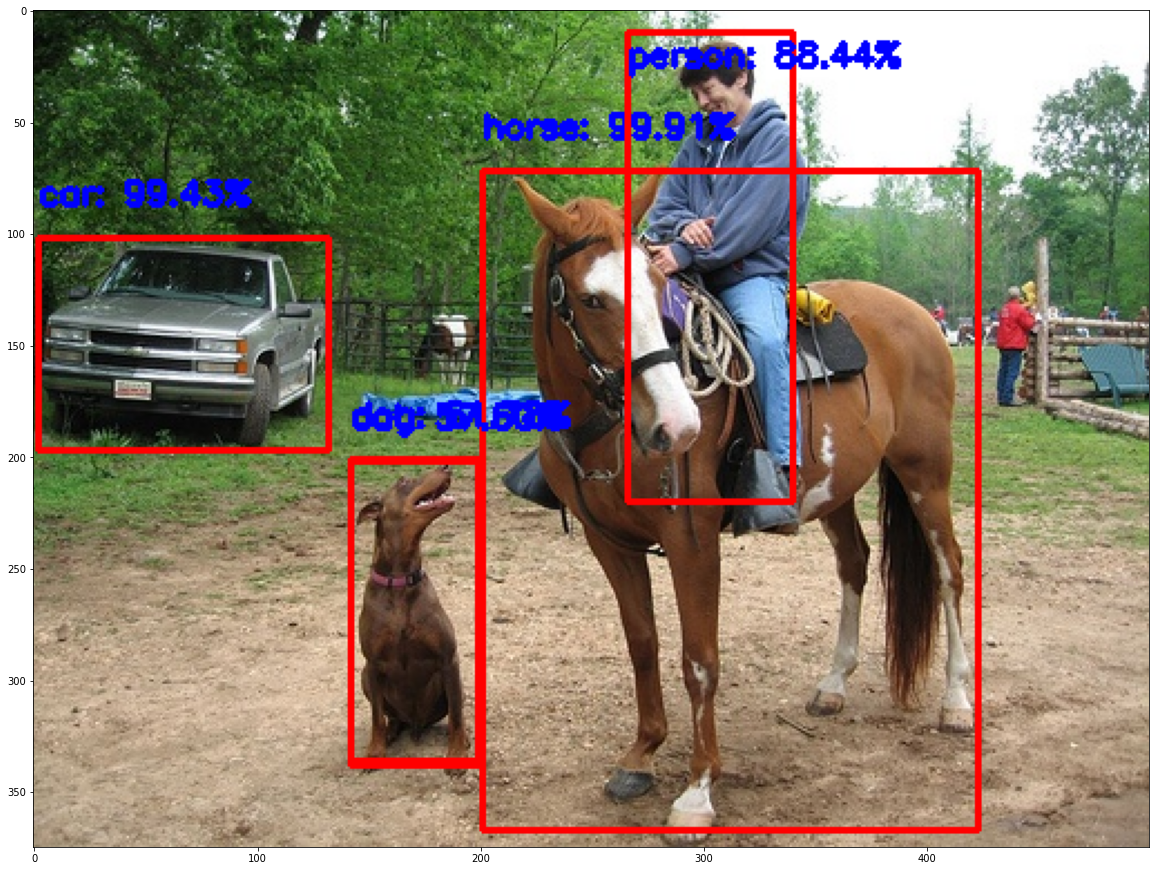

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

C	e	r	t	a	i	n	l	y	t	h	e	o	l	o	g	y	n	e	e	d	s	e	m	p	i	r	i	c	a	l	f	a	c	t	s	a	n	d	s	c	i	e	n	t	i	f	i	c	t	h	e	o	r	e	t	i	c	a	l	i	n	s	i	g	h	t	s	.	T	h	e	s	o	c	i	a	l	s	c	i	e	n	t	i	s	t	s	o	f	f	e	r	h	e	l	p	.	Y	e	t	t	h	e	y	d	o	n	o	t	a	c	c	o	m	p	l	i	s	h	w	h	a	t	I	m	u	s	t	n	o	w	a	t	t	e	m	p	t	.	M	y	m	a	i	n	q	u	e	s	t	i	o	n	i	s	w	h	e	r	e	a	n	d	h	o	w	t	h	e	c	h	u	r	c	h	m	u	s	t	s	t	a	n	d	t	o	b	e	t	h	e	w	i	t	n	e	s	s	i	n	g	c	h	u	r	c	h	;	t	h	a	t	i	s	,	w	h	a	t	m	u	s	t	b	e	t	h	e	r	e	l	a	t	i	o	n	b	e	t	w	e	e	n	t	h	e	c	u	l	t	u	r	e	t	h	a	t	i	s	t	h	e	c	h	u	r	c	h	(	a	n	d	t	h	e	l	a	r	g	e	r	C	h	r	i	s	t	i	a	n	a	n	d	b	i	b	l	i	c	a	l	m	e	t	a	c	u	l	t	u	r	e	t	h	e	c	h	u	r	c	h	r	e	p	r	e	s	e	n	t	s	)	a	n	d	t	h	o	s	e	c	u	l	t	u	r	e	s	t	h	e	c	h	u	r	c	h	i	n	d	w	e	l	l	s	,	e	v	a	n	g	e	l	i	z	e	s	,	s	e	r	v	e	s	?	A	n	s	w	e	r	i	n	g	w	i	l	l	T	e	q	u	i	r	e	a	l	l	t	h	e	r	e	s	o	u	r	c	e	s	t	h	a	t	C	h	r	i	s	t	i	a	n	t	h	e	o	l	o	g	y	c	a	n	b	r	i	n	g	t	o	b	e	a	r	,	a	n	d	n	o	t	a	l	i	t	t	l	e	h	e	l	p	f	r	o	m	s	u	c	h	a	s	B	e	r	g	e	r	a	n	d	B	e	l	l	a	h	a	

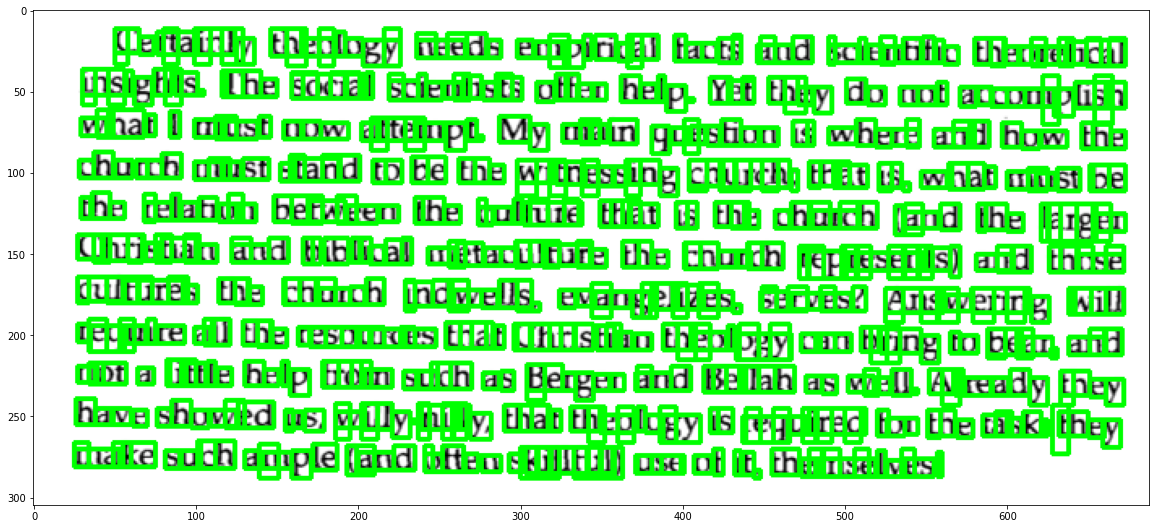

In [26]:
import cv2
import pytesseract as pyt

pyt.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img=cv2.imread('yv1ZE.png')

Himg,Wimg,_=img.shape
boxes=pyt.image_to_boxes(img,lang='eng')

for b in boxes.splitlines() :
    b=b.split(" ")
    
    x,y,w,h =int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,Himg-y),(w,Himg-h),(0,255,0),2)
    #cv2.putText(img,b[0],(x,Himg-y+150),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),3)
    print(b[0],end='\t')
plt.figure(figsize=(20,20))
plt.imshow(img)

h	o	s	a	m	e	l	s	a	y	e	d	f	a	k	h	e	r	c	o	m	p	u	t	e	r	v	i	s	i	o	n	0	1	2	3	4	5	6	7	8	9	1	0	1	1	

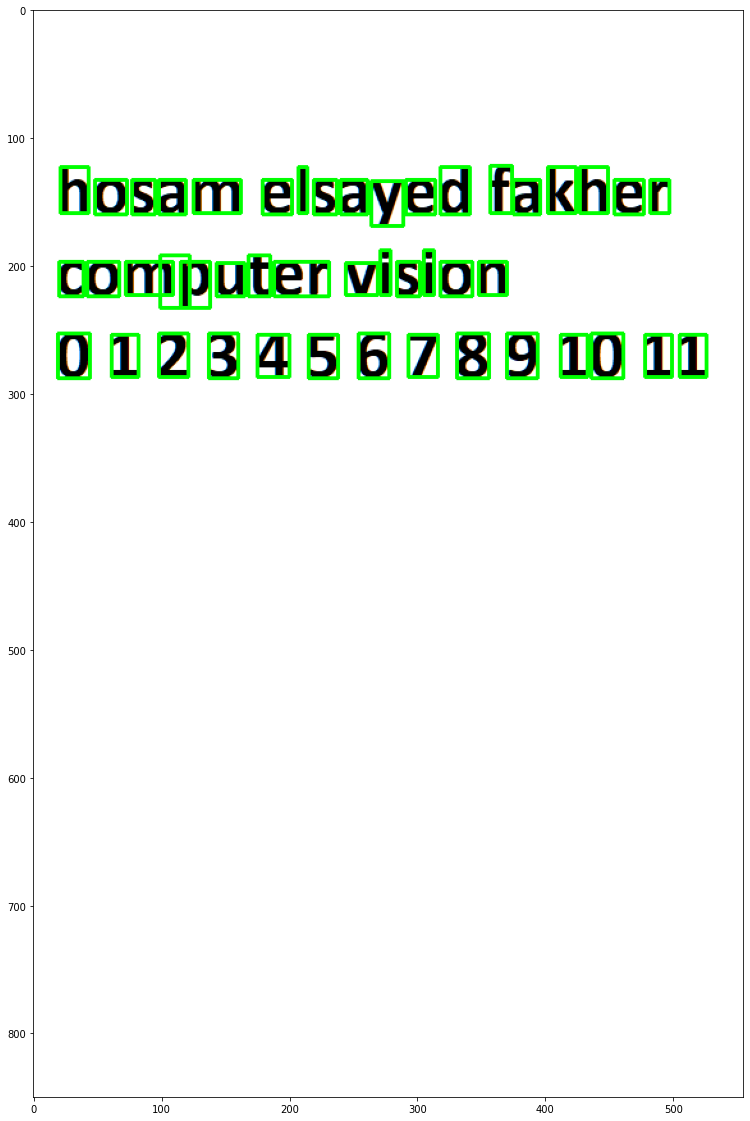

In [32]:
import cv2
import pytesseract as pyt

pyt.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img=cv2.imread('pyte_ocr.png')

Himg,Wimg,_=img.shape
boxes=pyt.image_to_boxes(img,lang='eng')

for b in boxes.splitlines() :
    b=b.split(" ")
    
    x,y,w,h =int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img,(x,Himg-y),(w,Himg-h),(0,255,0),2)
    #cv2.putText(img,b[0],(x,Himg-y+150),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),3)
    print(b[0],end='\t')
plt.figure(figsize=(20,20))
plt.imshow(img)

Certainly	theology	needs	empirical	facts	and	scientific	theoretical	insights.	The	social	scientists	offer	help.	Yet	they	do	not	accomplish	what	I	must	now	attempt.	My	main	question	is	where	and	how	the	church	must	stand	to	be	the	witnessing	church;	that	is,	what	must	be	the	relation	between	the	culture	that	is	the	church	(and	the	larger	Christian	and	biblical	metaculture	the	church	represents)	and	those	cultures	the	church	indwells,	evangelizes,	serves?	Answering	will	Tequire	all	the	resources	that	Christian	theology	can	bring	to	bear,	and	not	a	little	help	from	such	as	Berger	and	Bellah	as	well.	Already	they	have	showed	us,	willy-nilly,	that	theology	is	required	for	the	task:	they	make	such	ample	(and	often	skillful)	use	of	it,	themselves!	

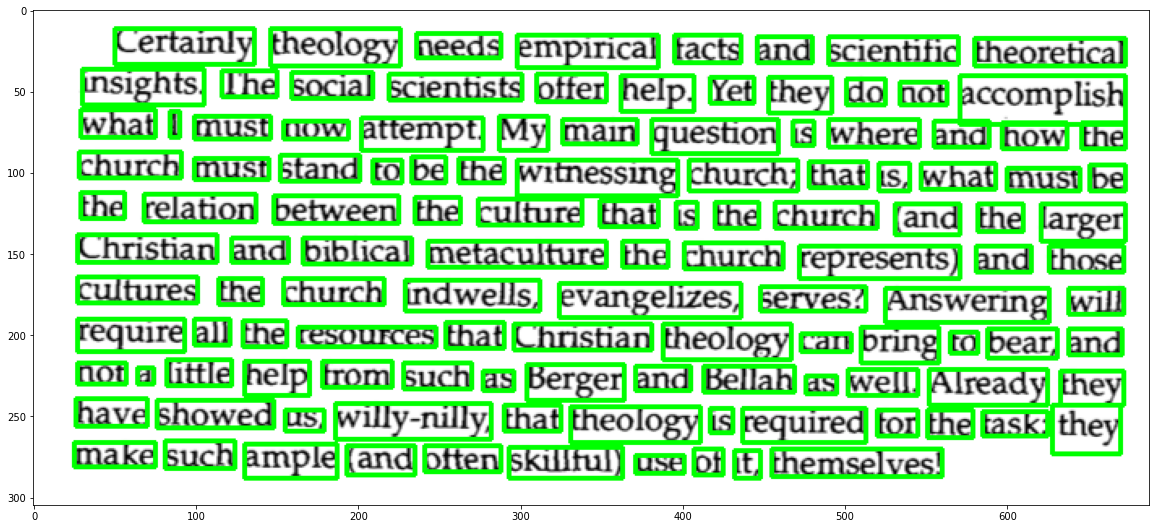

In [24]:
import cv2
import pytesseract as pyt

pyt.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#img=cv2.imread('pyte_ocr.png')
img=cv2.imread('yv1ZE.png')
boxes=pyt.image_to_data(img,lang='eng')

for x,b in enumerate(boxes.splitlines()) :
    if x!=0 :
        b=b.split()
        if len(b)==12 :
            x,y,w,h =int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),1)
            print(b[11],end="\t")
plt.figure(figsize=(20,20))
plt.imshow(img)

hosam	elsayed	fakher	computer	vision	01234567891011	

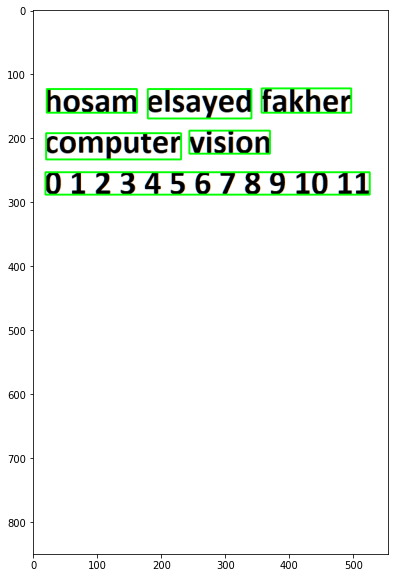

In [34]:
import cv2
import pytesseract as pyt

pyt.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img=cv2.imread('pyte_ocr.png')
boxes=pyt.image_to_data(img,lang='eng')

for x,b in enumerate(boxes.splitlines()) :
    if x!=0 :
        b=b.split()
        if len(b)==12 :
            x,y,w,h =int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),1)
            print(b[11],end="\t")
plt.figure(figsize=(10,10))
plt.imshow(img)